# Visualizing Using TensorBoard And Buliding Model Using Keras Functional API

In [8]:
# importing the modules required
import tensorflow as tf
import keras as keras
import matplotlib.pyplot as plt

In [2]:
# Loading data from keras dataset
data = keras.datasets.mnist

In [3]:
# load data
data = data.load_data()

In [4]:
X_train,y_train,X_test,y_test = data[0][0] , data[0][1], data[1][0],data[1][1]

In [5]:
# there are 60000 images in the train set and are of shape 28X28 pixels 
X_train.shape

(60000, 28, 28)

In [7]:
# There are 10000 images in the test set and are of shape 28X28
X_test.shape

(10000, 28, 28)

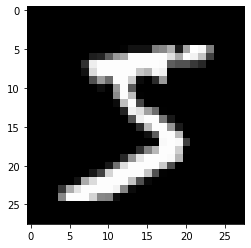

In [12]:
# Sample 
plt.imshow(X_train[0],cmap = 'gray')
plt.show()

<p style = 'color:red'>we can plot the same image using tensorboard we just need to log the image data into event files and point the tensor board to that location</p>
<p style = 'color:blue'>Tensor board excepts an image of shape:(batch_size,height,width,channels) so we need to reshape this 28X28 image to (1,28,28,1) image</p>

In [42]:
import time
import numpy as np
import os
path = os.path.join(os.curdir,'myLog')
def get_log_dir(name):
    dir = time.strftime(name+'_%Y_%M_%d_%H_%M_%S')
    return os.path.join(path,dir) 

# to this directory we are going to log the current image evnet file 
logdir = get_log_dir('image1')
file_writer = tf.summary.create_file_writer(logdir)

In [43]:
# This line will reshape the image and store the image event file in the sepecified directory
img=X_train[0].reshape(1,28,28,1)
# opens the file and writes the image into the file
with file_writer.as_default():
    tf.summary.image('image:',img,step = 0) 

<p style='color:#3872a2'>Now we can move to command line and use command <strong style='color:orange'> tensorboard --logdir=directory_name </strong>where the log files are stored then launch tensorboard then we can view the image in the dash board</p>

<h3 style:'color:red'> Viewing multiple images using tensorboard</h3>

In [44]:
images = X_train[:10]
images = images.reshape(10,28,28,1)
log_dir=get_log_dir('image2')
file_writer = tf.summary.create_file_writer(log_dir)
with file_writer.as_default():
    tf.summary.image('firt 10 images',images,max_outputs=10,step=0)
# using this we can view multiple images in the 

<h2 style='color:red'>Functional API</h2>

<p style='color:#3872a2'>Creating a Model Using functional API . Keras Functional Api gives lot of flexiblity in creating cutom models that are not possible with Sequential API , we can build complex models that are not in sequence for instance we can pass two different inputs etc..</p>

In [49]:
# splliting the data into test and train set 
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_test = train_test_split(X_train,y_train,test_size=.25,random_state=42)

In [46]:
# input layer
input1 = keras.layers.Input(shape = [28,28,1])
layer1 = keras.layers.Conv2D(64,5,activation = 'relu',padding = 'same')(input1)
layer2 = keras.layers.MaxPool2D(2)
layer2 = layer2(layer1)
layer3 = keras.layers.Conv2D(128,3,activation = 'relu',padding = 'same')
layer3 = layer3(layer2)
layer4 = keras.layers.GlobalAvgPool2D()(layer3)
layer5 = keras.layers.Flatten()(layer4)
layer6 = keras.layers.concatenate([layer5,keras.layers.Flatten()(input1)])
layer7 = keras.layers.Dense(128,activation='relu')(layer6)
output = keras.layers.Dense(10,activation='softmax')(layer7)
model = keras.Model(inputs=[input1] , outputs =[output])

<h3 style='color:red'>MODEL:</h3>
    <ul style='color:#3872a2'><li>First we are creating an input layer of size of <span style='color:orange'>shape:(height,width,channels)</span></li>
<li>Then a Conv2d is created and with a filter of shape <span style='color:orange'>shape:5X5</span> and 64 feature maps</li>
    <li>The the output of layer2 is created and output of the layer1 is sent as input to the Maxpooling layer where the image size will be cutdown by half of <span style='color:orange'>shape:(14,14,64)</span></li>
    <li>There after a new Convolutional layer is created and the output of the layer3 is passed as input to these layer in these layer 128 feature maps are generated </li>
    
</ul>

In [53]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 64)   1664        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 14, 14, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 128)  73856       max_pooling2d[0][0]              
______________________________________________________________________________________________

<h3 style='color:red'>Call Backs</h3>

<p style='color:#3872a2'>Using tensorflow we can create a call backs then tensor flow calls this functions while at the start of the epoch or after each training step or end of training based on our configuration and excutes the function we specified . Using callbacks we can perfom tasks like saving the model , writing event files to the tensorflow files etc..</p>

In [60]:
callback = keras.callbacks.TensorBoard(get_log_dir('train'),histogram_freq=1)

In [61]:
model.compile(loss='sparse_categorical_crossentropy',metrics = 'accuracy', optimizer = 'adam')

In [62]:
model.fit(X_train,y_train,epochs=5,validation_data =[X_cv,y_test],callbacks=[callback])

Epoch 1/5
1407/1407 [==============================] - 96s 68ms/step - loss: 3.1088 - accuracy: 0.8556 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
1407/1407 [==============================] - 97s 69ms/step - loss: 0.4045 - accuracy: 0.9052 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/5
1407/1407 [==============================] - 99s 71ms/step - loss: 0.3003 - accuracy: 0.9290 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/5
1407/1407 [==============================] - 96s 68ms/step - loss: 0.2359 - accuracy: 0.9419 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/5
1407/1407 [==============================] - 99s 71ms/step - loss: 0.2057 - accuracy: 0.9504 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [24]:
X_train = X_train.reshape(60000,28,28,1)

In [64]:
y_test.shape

(15000,)

In [65]:
X_cv.shape

(15000, 28, 28)